In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('playstore-data.csv.gz',compression='gzip')

In [7]:
data

,Unnamed: 0,Category,Free,Price,Size,Min_Version,Released_Before,Updated_Before,Content,Ad_Support,Inapp_Purchase,Min_Downloads,Average_Downloads
0,0,Adventure,True,0.0,10.0,7.1,18,18,Everyone,False,False,10,12
1,1,Tools,True,0.0,2.9,5.0,16,4,Everyone,True,False,5000,6331
2,2,Productivity,True,0.0,3.7,4.0,25,25,Everyone,False,False,50,54
3,3,Communication,True,0.0,1.8,4.0,36,35,Everyone,True,False,10,14
4,4,Tools,True,0.0,6.2,4.1,18,34,Everyone,False,False,100,289
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135250,2135250,Education,True,0.0,10.0,4.1,39,33,Everyone,True,False,1000,1490
2135251,2135251,Education,True,0.0,44.0,4.1,44,43,Everyone,False,False,100,265
2135252,2135252,Education,True,0.0,29.0,5.0,37,37,Everyone,False,False,100,151
2135253,2135253,Music & Audio,True,0.0,10.0,5.0,61,4,Everyone,True,False,1000,1817


In [8]:
data.drop(columns = 'Unnamed: 0',axis=1,inplace = True)
data

,Category,Free,Price,Size,Min_Version,Released_Before,Updated_Before,Content,Ad_Support,Inapp_Purchase,Min_Downloads,Average_Downloads
0,Adventure,True,0.0,10.0,7.1,18,18,Everyone,False,False,10,12
1,Tools,True,0.0,2.9,5.0,16,4,Everyone,True,False,5000,6331
2,Productivity,True,0.0,3.7,4.0,25,25,Everyone,False,False,50,54
3,Communication,True,0.0,1.8,4.0,36,35,Everyone,True,False,10,14
4,Tools,True,0.0,6.2,4.1,18,34,Everyone,False,False,100,289
...,...,...,...,...,...,...,...,...,...,...,...,...
2135250,Education,True,0.0,10.0,4.1,39,33,Everyone,True,False,1000,1490
2135251,Education,True,0.0,44.0,4.1,44,43,Everyone,False,False,100,265
2135252,Education,True,0.0,29.0,5.0,37,37,Everyone,False,False,100,151
2135253,Music & Audio,True,0.0,10.0,5.0,61,4,Everyone,True,False,1000,1817


**DataFrame** which consist onli **Numerical** columns ...

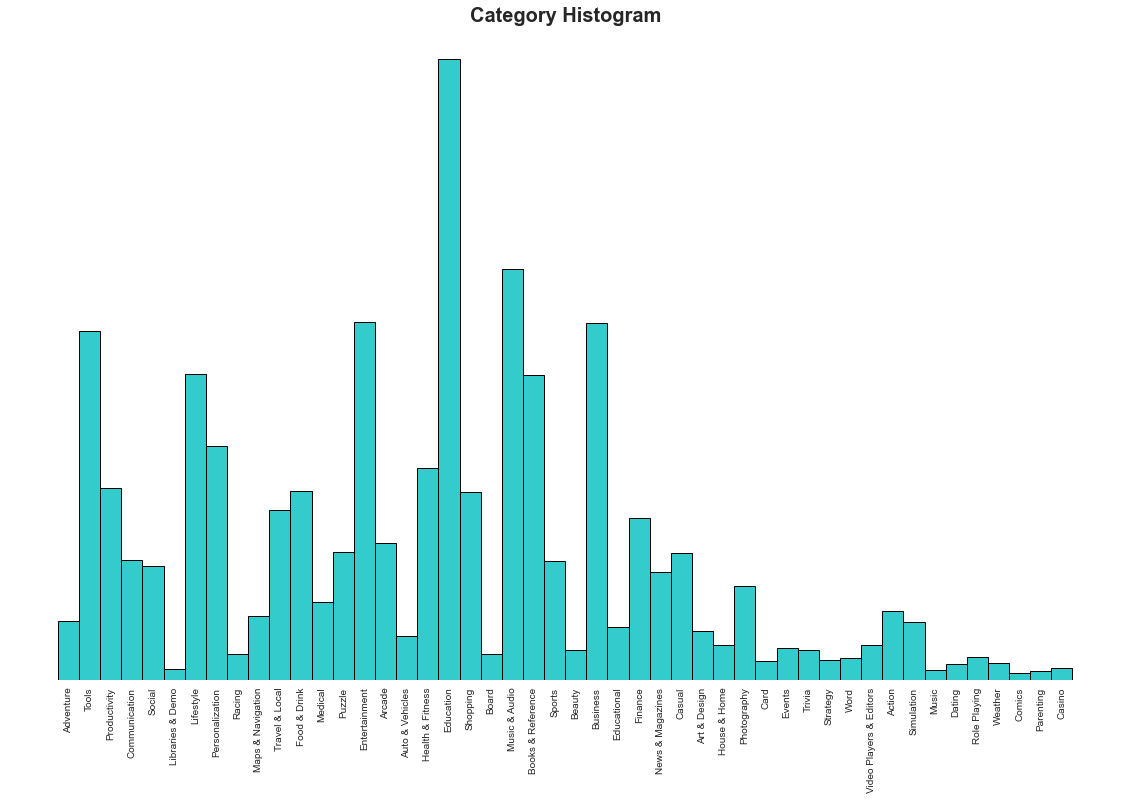

<Figure size 432x288 with 0 Axes>

In [32]:
fig1,ax = plt.subplots(figsize = (20,12))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.title("Category Histogram",weight = 'bold',fontsize = 20)
sns.histplot(x = 'Category',data = data,bins=50,color = 'c',alpha = 0.8,edgecolor='k')
plt.xticks(rotation = 90,weight = 'normal',fontsize = 10)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_yticks([])
plt.grid(False)
plt.show()
plt.savefig("Category_Histogram.png");

<ipython-input-30-bb80f9660e2f>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=a_list,weight='bold')


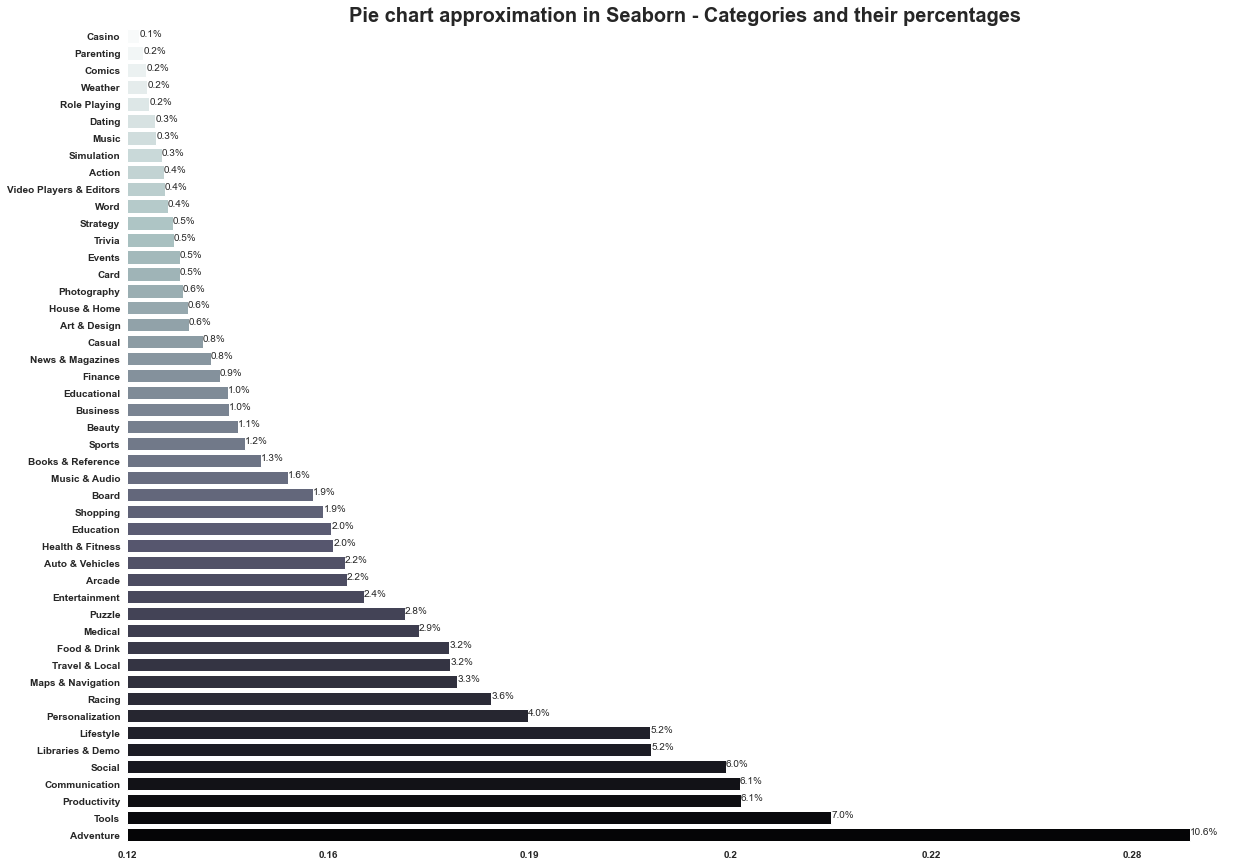

In [30]:
#Seaborn Horizontal barplot
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(20,15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
a_list = ((data['Category'].value_counts()/data.shape[0])*100).values.tolist()
a_list = [round(num,2) for num in a_list]
a_list = sorted(a_list, reverse=False) 
b_list = data['Category'].unique().tolist()
b_list.reverse()
ax = sns.barplot(x=a_list, y=b_list, data=data, ci=None, palette="bone_r",orient='h' )
ax.set_title("Pie chart approximation in Seaborn - Categories and their percentages", fontsize=20,weight = 'bold')
ax.set_yticklabels(labels=b_list,weight='bold')
ax.set_xticklabels(labels=a_list,weight='bold')
ax.grid(False)
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width() )
bar.savefig("Category pie chart approximation.png");

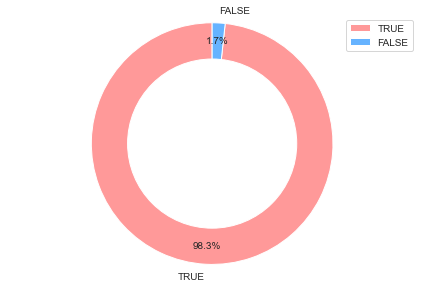

<Figure size 432x288 with 0 Axes>

In [90]:
import matplotlib.pyplot as plt
# Pie chart
labels = ['TRUE','FALSE']
sizes = [ len(data[data['Free'] == True].index.to_list()) , len(data[data['Free'] == False].index.to_list())]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.05,0.05)
fig1, ax1 = plt.subplots()
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()
plt.savefig('free_pieChart.png')

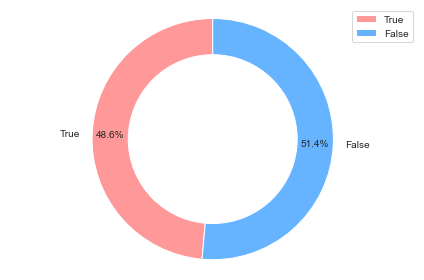

<Figure size 432x288 with 0 Axes>

In [91]:
import matplotlib.pyplot as plt
# Pie chart
a_list = ((data['Ad_Support'].value_counts()/data.shape[0])*100).values.tolist()
a_list = [round(num,2) for num in a_list]
a_list = sorted(a_list, reverse=False) 
b_list = data['Ad_Support'].unique().tolist()
b_list.reverse()
labels = b_list
sizes = a_list
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()
plt.savefig('Ad_supported_pieChart.png')

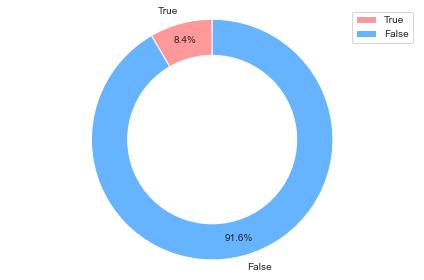

<Figure size 432x288 with 0 Axes>

In [92]:
import matplotlib.pyplot as plt
# Pie chart
a_list = ((data['Inapp_Purchase'].value_counts()/data.shape[0])*100).values.tolist()
a_list = [round(num,2) for num in a_list]
a_list = sorted(a_list, reverse=False) 
b_list = data['Inapp_Purchase'].unique().tolist()
b_list.reverse()
labels = b_list
sizes = a_list
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()
plt.savefig('Inapp_Purchases_pieChart.png')